In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns  
os.chdir("/home/labpc6c/Documents/Mo_emam/GID_mo_emam/")


/home/labpc6c/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [18]:


protein = pd.read_excel("/home/labpc6c/Documents/Mo_emam/mmc3.xlsx", sheet_name=1, skiprows=1, index_col=0)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(protein), columns=protein.columns, index=protein.index)

# Standardize features
scaler = StandardScaler()
new_protein_df= pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns, index=df_imputed.index)


In [19]:
mask_matrix = protein.isna()


In [20]:
col = [col.split(';')[1].split('_')[0] for col in new_protein_df.columns]
row = [col.split(';')[0] for col in new_protein_df.index]
new_protein_df.index = row
new_protein_df.columns = col

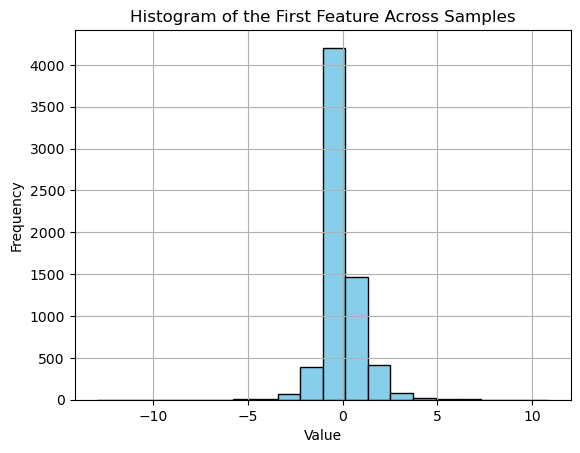

In [7]:
import matplotlib.pyplot as plt

# Transpose the DataFrame
transposed_df = new_protein_df

# Plot histogram for the first feature
plt.hist(transposed_df.iloc[0], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the First Feature Across Samples')
plt.grid(True)
plt.show()


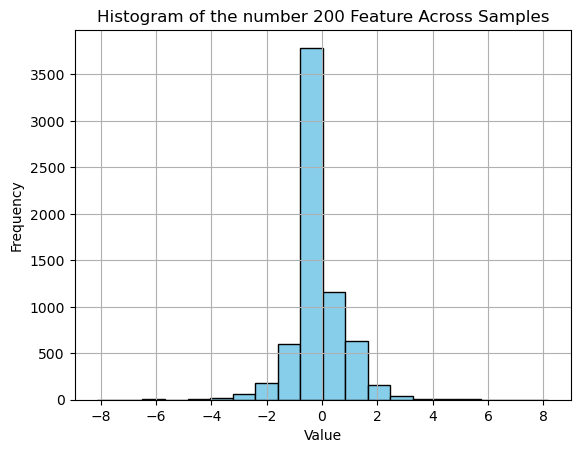

In [8]:
import matplotlib.pyplot as plt

# Transpose the DataFrame
transposed_df = new_protein_df

# Plot histogram for the first feature
plt.hist(transposed_df.iloc[200], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the number 200 Feature Across Samples')
plt.grid(True)
plt.show()

In [9]:
meta_adata= pd.read_csv("./model_list_20230517.csv", sep = ",")
meta_data = meta_adata.set_index("model_id")
final_meta_data = meta_data.loc[new_protein_df.index]
# Create a new column 'one_vs_rest' based on 'tissue_status'
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
final_meta_data['tissue_encoded'] = label_encoder.fit_transform(final_meta_data['tissue'])



In [10]:
dataset = pd.read_csv("/home/labpc6c/Documents/Mo_emam/9606.protein.links.v12.0.txt", sep= ' ')

In [11]:
datainfo = pd.read_csv("/home/labpc6c/Documents/Mo_emam/9606.protein.info.v12.0.txt", sep= '\t')

In [12]:
import pandas as pd
import numpy as np

# Assuming `datainfo` DataFrame has columns: ['#string_protein_id', 'preferred_name']
# and `dataset` DataFrame has columns: ['protein1', 'protein2', 'combined_score']

# Create a dictionary mapping protein IDs to preferred names
id_to_name = dict(zip(datainfo['#string_protein_id'], datainfo['preferred_name']))

# Update values in 'protein1' and 'protein2' columns using the map function
dataset['protein1'] = dataset['protein1'].map(id_to_name)
dataset['protein2'] = dataset['protein2'].map(id_to_name)

# Filter the dataset based on the condition
dataset_filtered = dataset[dataset['combined_score'] >= 900]

# Assuming new_protein_df is your DataFrame containing the list of proteins
# and dataset_filtered is your DataFrame with columns 'protein1', 'protein2', and 'combined_score'

# Create a boolean mask for rows where either 'protein1' or 'protein2' is in your new_protein_df columns
mask = dataset_filtered['protein1'].isin(new_protein_df.columns) & dataset_filtered['protein2'].isin(new_protein_df.columns)

# Use the mask to filter the dataset
filtered_dataset = dataset_filtered[mask]

# Create the adjacency matrix
adj_matrix = pd.crosstab(filtered_dataset['protein1'], filtered_dataset['protein2'])

# Make sure the matrix is symmetric
adj_matrix = adj_matrix + adj_matrix.T.fillna(0) - adj_matrix * adj_matrix.T

# Fill the diagonal with ones to indicate self-connections
np.fill_diagonal(adj_matrix.values, 1)


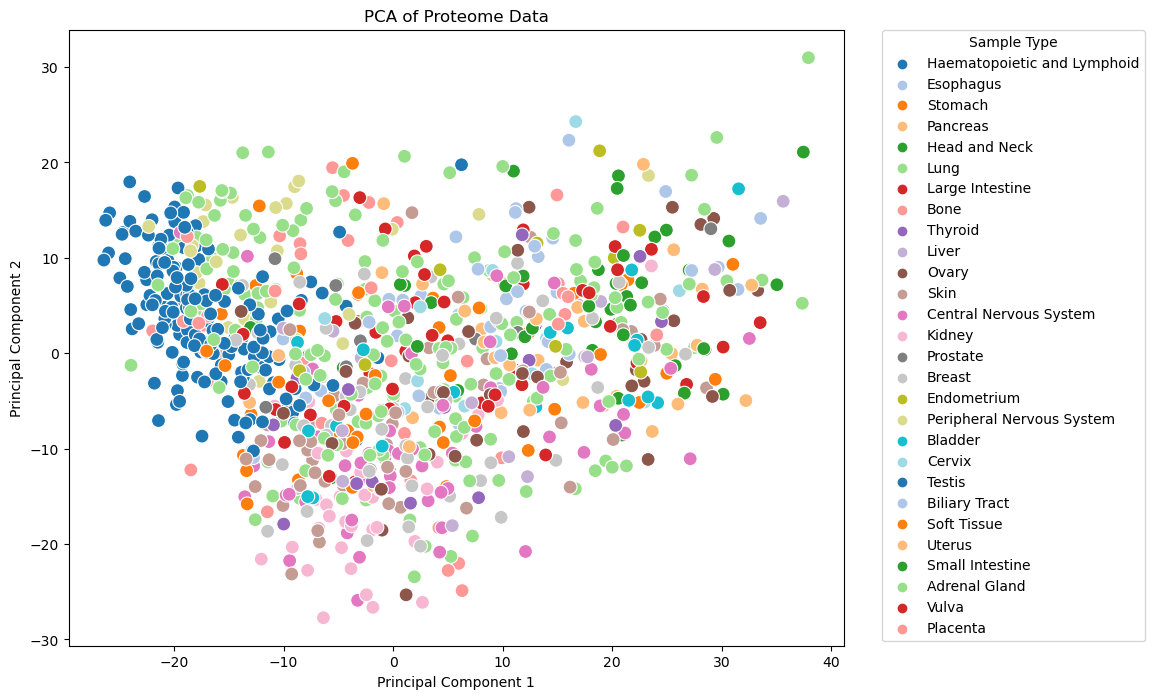

In [13]:
# Assuming `new_protein_df` and `adj_matrix` are already defined
# Fill missing values with the mean of each column
data = new_protein_df[adj_matrix.columns].fillna(new_protein_df[adj_matrix.columns].mean())

# Proceed with PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Convert principal components to DataFrame
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add sample labels to the PCA DataFrame for visualization
df_pca['Sample Type'] = np.array(final_meta_data["tissue"])

# Ensure the palette has enough unique colors for all classes
palette = sns.color_palette("hsv", 28)  # hsv palette is good for distinct colors

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Sample Type', palette='tab20', s=100)
plt.title('PCA of Proteome Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sample Type', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


/home/labpc6c/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:251: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 1/1500, Loss: 0.9977
Epoch 2/1500, Loss: 0.9789
Epoch 3/1500, Loss: 0.9400
Epoch 4/1500, Loss: 0.9086
Epoch 5/1500, Loss: 0.8909
Epoch 6/1500, Loss: 0.8767
Epoch 7/1500, Loss: 0.8662
Epoch 8/1500, Loss: 0.8584
Epoch 9/1500, Loss: 0.8492
Epoch 10/1500, Loss: 0.8408
Epoch 11/1500, Loss: 0.8347
Epoch 12/1500, Loss: 0.8277
Epoch 13/1500, Loss: 0.8222
Epoch 14/1500, Loss: 0.8163
Epoch 15/1500, Loss: 0.8110
Epoch 16/1500, Loss: 0.8087
Epoch 17/1500, Loss: 0.8031
Epoch 18/1500, Loss: 0.7988
Epoch 19/1500, Loss: 0.7958
Epoch 20/1500, Loss: 0.7931
Epoch 21/1500, Loss: 0.7897
Epoch 22/1500, Loss: 0.7881
Epoch 23/1500, Loss: 0.7844
Epoch 24/1500, Loss: 0.7818
Epoch 25/1500, Loss: 0.7790
Epoch 26/1500, Loss: 0.7786
Epoch 27/1500, Loss: 0.7771
Epoch 28/1500, Loss: 0.7742
Epoch 29/1500, Loss: 0.7705
Epoch 30/1500, Loss: 0.7691
Epoch 31/1500, Loss: 0.7683
Epoch 32/1500, Loss: 0.7655
Epoch 33/1500, Loss: 0.7636
Epoch 34/1500, Loss: 0.7625
Epoch 35/1500, Loss: 0.7600
Epoch 36/1500, Loss: 0.7587
E

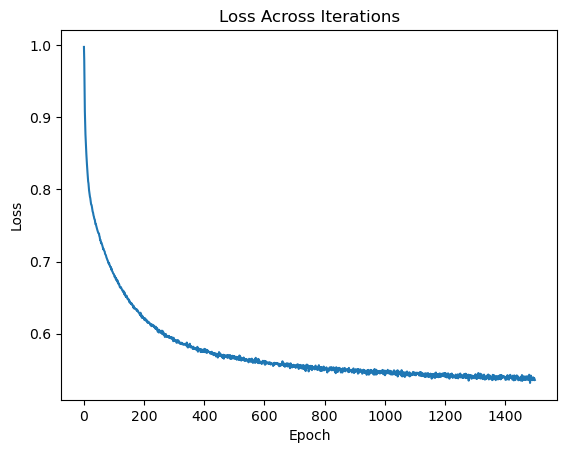

Shape of latent representations: (949, 128)


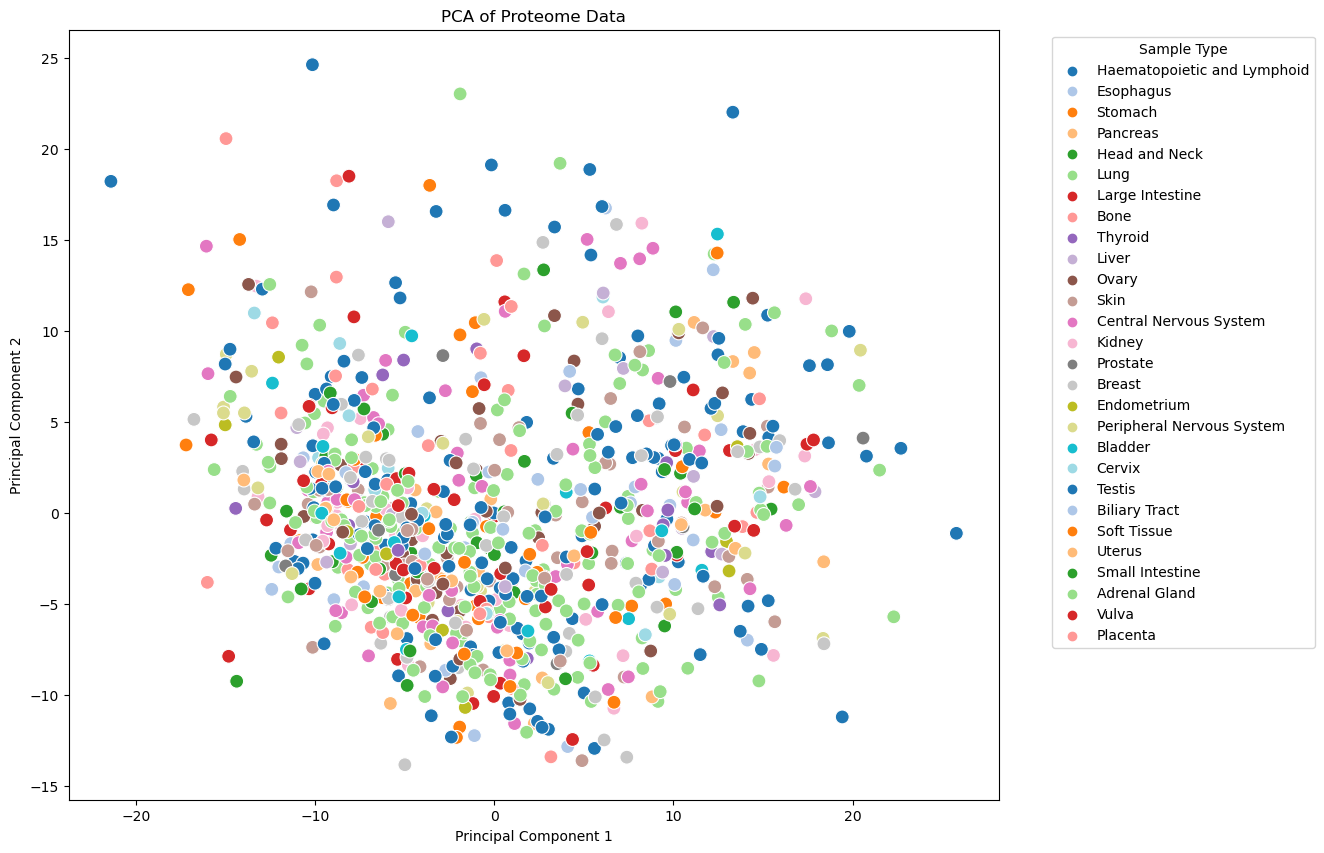

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Normalization
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, features, adj_matrix):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.adj_matrix = torch.tensor(adj_matrix.values, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.adj_matrix[idx]

# Define Encoder Model
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, latent_dim)
        self.dropout = nn.Dropout(p=0.2)  # Add dropout for regularization

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define Decoder Model
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(p=0.2)  # Add dropout for regularization

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define Graph Autoencoder Model
class GraphAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(GraphAutoencoder, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon

# Set Hyperparameters
input_dim = data.shape[1]  # Number of input features
hidden_dim = 256  # Increased hidden dimension
latent_dim = 128  # Increased latent dimension
num_epochs = 1500  # Increased number of epochs
batch_size = 32
learning_rate = 0.0001

# Initialize Model, Loss, and Optimizer
model = GraphAutoencoder(input_dim, hidden_dim, latent_dim)
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Prepare DataLoader
dataset = CustomDataset(data, adj_matrix)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training Loop
losses = []  # To store loss values
for epoch in range(num_epochs):
    running_loss = 0.0
    for features, _ in dataloader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, features)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(dataloader)
    losses.append(epoch_loss)  # Store the loss for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Plot the loss across iterations
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Across Iterations')
plt.show()

# Extract Latent Representations
latent_representations = []

with torch.no_grad():
    for features, _ in dataloader:
        latent = model.encoder(features)
        latent_representations.append(latent.numpy())

latent_representations = np.concatenate(latent_representations, axis=0)

# Print the shape to confirm it's (number_of_samples, latent_dim)
print("Shape of latent representations:", latent_representations.shape)

# Perform PCA on the latent representations
pca = PCA(n_components=2)
pca_result = pca.fit_transform(latent_representations)

# Convert PCA results to DataFrame
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Sample Type'] = np.array(final_meta_data["tissue"])

# Plot PCA results
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Sample Type', palette='tab20', s=100, legend='full')
plt.title('PCA of Proteome Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sample Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Epoch 1/500, Loss: 2805.1555
Epoch 2/500, Loss: 2427.1591
Epoch 3/500, Loss: 2289.1276
Epoch 4/500, Loss: 2212.3382
Epoch 5/500, Loss: 2180.7263
Epoch 6/500, Loss: 2141.7808
Epoch 7/500, Loss: 2112.4852
Epoch 8/500, Loss: 2093.5510
Epoch 9/500, Loss: 2072.7506
Epoch 10/500, Loss: 2056.1284
Epoch 11/500, Loss: 2049.3134
Epoch 12/500, Loss: 2039.0872
Epoch 13/500, Loss: 2028.4598
Epoch 14/500, Loss: 2023.5099
Epoch 15/500, Loss: 2015.7415
Epoch 16/500, Loss: 2008.8812
Epoch 17/500, Loss: 2000.8762
Epoch 18/500, Loss: 2000.0184
Epoch 19/500, Loss: 1993.6697
Epoch 20/500, Loss: 1989.7150
Epoch 21/500, Loss: 1989.5021
Epoch 22/500, Loss: 1987.7143
Epoch 23/500, Loss: 1982.2555
Epoch 24/500, Loss: 1979.9735
Epoch 25/500, Loss: 1971.9760
Epoch 26/500, Loss: 1977.2903
Epoch 27/500, Loss: 1972.8465
Epoch 28/500, Loss: 1974.0299
Epoch 29/500, Loss: 1962.4001
Epoch 30/500, Loss: 1968.3924
Epoch 31/500, Loss: 1963.3042
Epoch 32/500, Loss: 1961.8464
Epoch 33/500, Loss: 1958.6858
Epoch 34/500, Loss:

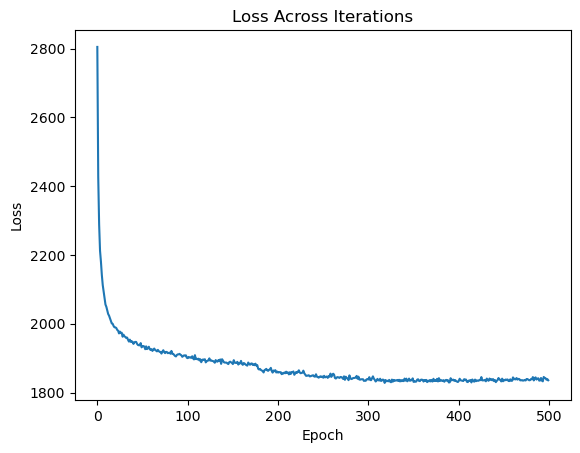

Shape of latent representations: (949, 64)


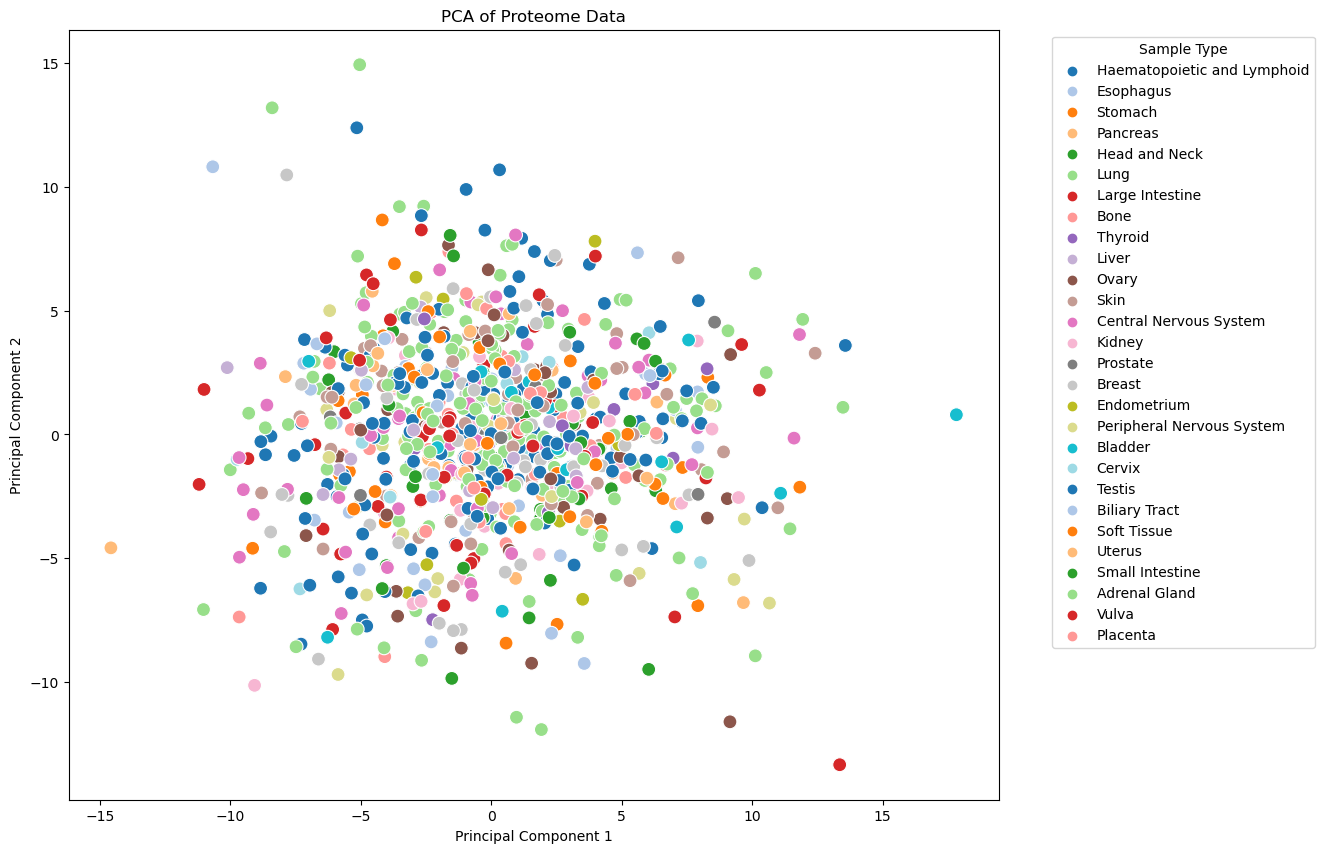

In [27]:
#Please_focus_on_this_VAE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Normalization
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, features):
        self.features = torch.tensor(features, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx]

# Define Encoder Model with increased depth and capacity
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dims, latent_dim):
        super(Encoder, self).__init__()
        layers = []
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(input_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.ELU())
            layers.append(nn.Dropout(p=0.3))
            input_dim = hidden_dim
        self.fc_mu = nn.Linear(hidden_dims[-1], latent_dim)
        self.fc_logvar = nn.Linear(hidden_dims[-1], latent_dim)
        self.encoder = nn.Sequential(*layers)

    def forward(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

# Define Decoder Model with increased depth and capacity
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dims, output_dim):
        super(Decoder, self).__init__()
        layers = []
        for hidden_dim in reversed(hidden_dims):
            layers.append(nn.Linear(latent_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.ELU())
            layers.append(nn.Dropout(p=0.3))
            latent_dim = hidden_dim
        layers.append(nn.Linear(hidden_dims[0], output_dim))
        self.decoder = nn.Sequential(*layers)

    def forward(self, x):
        x = self.decoder(x)
        return x

# Define Variational Autoencoder Model
class VariationalAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dims, latent_dim):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dims, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dims, input_dim)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

# Set Hyperparameters
input_dim = data.shape[1]
hidden_dims = [512, 256, 128, 64]  # Multiple hidden layers
latent_dim = 64  # Increased latent dimension
num_epochs = 500
batch_size = 64
learning_rate = 0.001
weight_decay = 1e-6
#kl_weight_sta = 0.0001
#kl_esight use very low kl_weight not 

beta = 2  # Beta-VAE parameter

# Initialize Model, Loss, and Optimizer
model = VariationalAutoencoder(input_dim, hidden_dims, latent_dim)
criterion = nn.MSELoss(reduction='sum')
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5)
#Please, see the lr_schedular "we do not need to sue"#No scheudlar
# Prepare DataLoader
dataset = CustomDataset(data)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training Loop with KL Divergence Weight Annealing
def loss_function(recon_x, x, mu, logvar, kl_weight, beta):
    MSE = criterion(recon_x, x)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + kl_weight * beta * KLD

losses = []
for epoch in range(num_epochs):
    running_loss = 0.0
    kl_weight = kl_weight_start + (kl_weight_end - kl_weight_start) * (epoch / num_epochs)
    for features in dataloader:
        optimizer.zero_grad()
        outputs, mu, logvar = model(features)
        loss = loss_function(outputs, features, mu, logvar, kl_weight, beta)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(dataloader.dataset)
    losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")
    scheduler.step(epoch_loss)

# Plot the loss across iterations
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Across Iterations')
plt.show()

# Extract Latent Representations
latent_representations = []

with torch.no_grad():
    for features in dataloader:
        mu, logvar = model.encoder(features)
        latent = model.reparameterize(mu, logvar)
        latent_representations.append(latent.numpy())

latent_representations = np.concatenate(latent_representations, axis=0)

# Print the shape to confirm it's (number_of_samples, latent_dim)
print("Shape of latent representations:", latent_representations.shape)

# Perform PCA on the latent representations
pca = PCA(n_components=2)
pca_result = pca.fit_transform(latent_representations)

# Convert PCA results to DataFrame
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Sample Type'] = np.array(final_meta_data["tissue"])

# Plot PCA results
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Sample Type', palette='tab20', s=100, legend='full')
plt.title('PCA of Proteome Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sample Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Epoch 1/2000, Loss: 4.0897
Epoch 2/2000, Loss: 3.5106
Epoch 3/2000, Loss: 3.1179
Epoch 4/2000, Loss: 2.7951
Epoch 5/2000, Loss: 2.5325
Epoch 6/2000, Loss: 2.2976
Epoch 7/2000, Loss: 2.1149
Epoch 8/2000, Loss: 1.9488
Epoch 9/2000, Loss: 1.8037
Epoch 10/2000, Loss: 1.6683
Epoch 11/2000, Loss: 1.5549
Epoch 12/2000, Loss: 1.4614
Epoch 13/2000, Loss: 1.3764
Epoch 14/2000, Loss: 1.2956
Epoch 15/2000, Loss: 1.2320
Epoch 16/2000, Loss: 1.1853
Epoch 17/2000, Loss: 1.1368
Epoch 18/2000, Loss: 1.0907
Epoch 19/2000, Loss: 1.0587
Epoch 20/2000, Loss: 1.0175
Epoch 21/2000, Loss: 1.0037
Epoch 22/2000, Loss: 0.9718
Epoch 23/2000, Loss: 0.9575
Epoch 24/2000, Loss: 0.9400
Epoch 25/2000, Loss: 0.9253
Epoch 26/2000, Loss: 0.9096
Epoch 27/2000, Loss: 0.9055
Epoch 28/2000, Loss: 0.8912
Epoch 29/2000, Loss: 0.8807
Epoch 30/2000, Loss: 0.8764
Epoch 31/2000, Loss: 0.8697
Epoch 32/2000, Loss: 0.8601
Epoch 33/2000, Loss: 0.8515
Epoch 34/2000, Loss: 0.8479
Epoch 35/2000, Loss: 0.8476
Epoch 36/2000, Loss: 0.8396
E

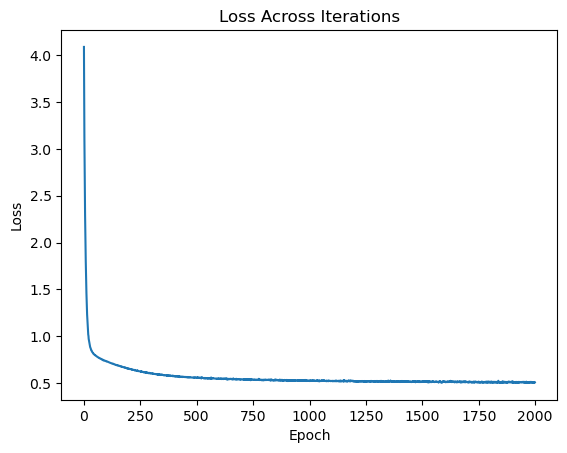

Weighted F1 Score: 0.5589


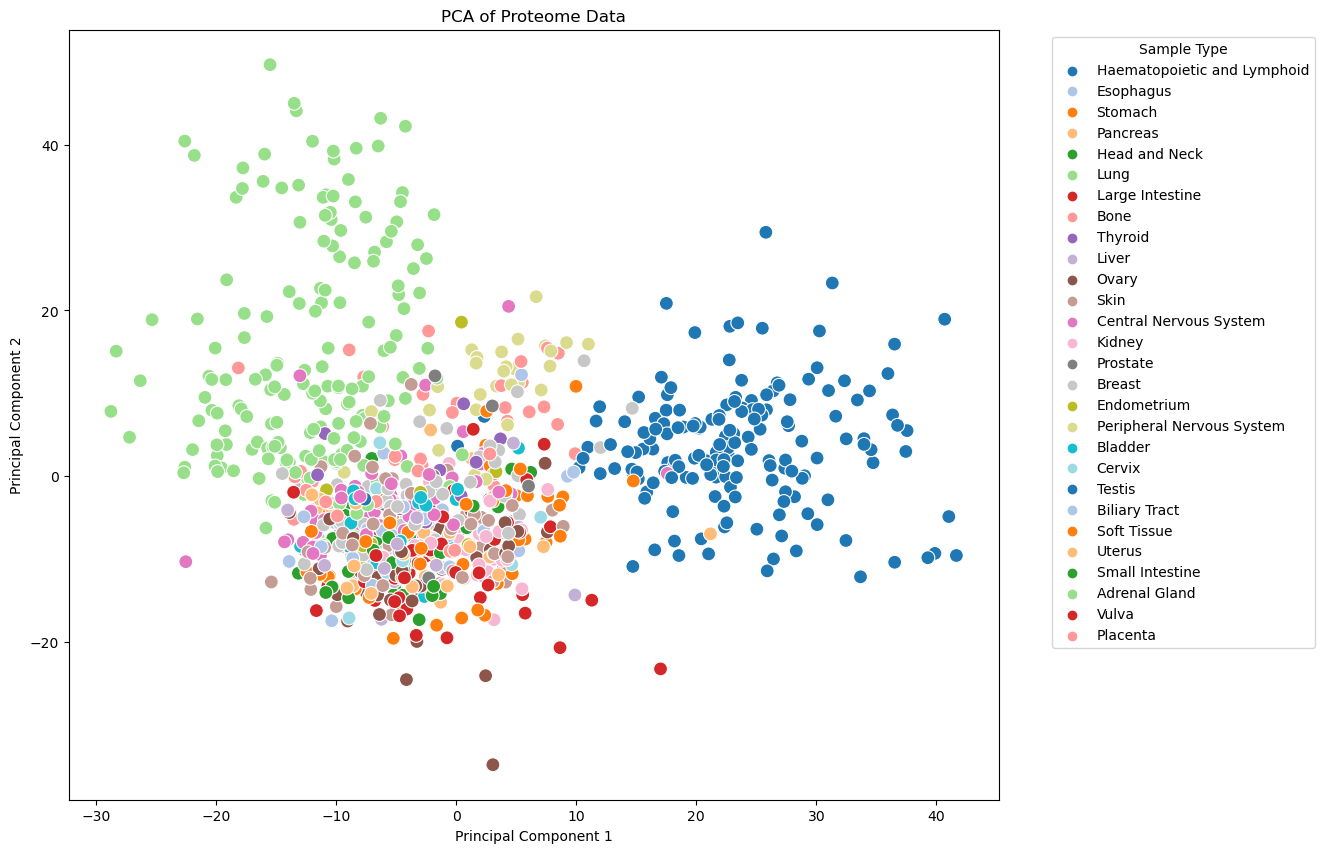

In [248]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess metadata
meta_data = pd.read_csv("./model_list_20230517.csv", sep=",")
meta_data = meta_data.set_index("model_id")
final_meta_data = meta_data.loc[new_protein_df.index]

# Encode tissue labels
label_encoder = LabelEncoder()
final_meta_data['tissue_encoded'] = label_encoder.fit_transform(final_meta_data['tissue'])

# Data Normalization
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, features, adj_matrix, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.adj_matrix = torch.tensor(adj_matrix.values, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.adj_matrix[idx], self.labels[idx]

# Define Encoder Model
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, latent_dim)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define Decoder Model
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define Classifier Model
class Classifier(nn.Module):
    def __init__(self, latent_dim, num_classes):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(latent_dim, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        return x

# Define Graph Autoencoder Model
class GraphAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, num_classes):
        super(GraphAutoencoder, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)
        self.classifier = Classifier(latent_dim, num_classes)

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        class_output = self.classifier(z)
        return x_recon, class_output

# Set Hyperparameters
input_dim = data.shape[1]
hidden_dim = 256
latent_dim = 128
num_classes = len(label_encoder.classes_)
num_epochs = 2000
batch_size = 32
learning_rate = 0.0001

# Prepare dataset and split into train and test sets
labels = final_meta_data['tissue_encoded'].values
dataset = CustomDataset(data, adj_matrix, labels)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize Model, Losses, and Optimizer
model = GraphAutoencoder(input_dim, hidden_dim, latent_dim, num_classes)
reconstruction_criterion = nn.MSELoss()
classification_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for features, _, labels in train_loader:
        optimizer.zero_grad()
        outputs, class_outputs = model(features)
        recon_loss = reconstruction_criterion(outputs, features)
        class_loss = classification_criterion(class_outputs, labels)
        loss = recon_loss + class_loss
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Plot the loss across iterations
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Across Iterations')
plt.show()

# Evaluation
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for features, _, labels in test_loader:
        _, class_outputs = model(features)
        preds = torch.argmax(class_outputs, dim=1)
        all_labels.extend(labels.numpy())
        all_preds.extend(preds.numpy())

# Calculate F1 Score
f1 = f1_score(all_labels, all_preds, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")

# Extract Latent Representations for the entire dataset
latent_representations = []

with torch.no_grad():
    for features, _, _ in DataLoader(dataset, batch_size=batch_size, shuffle=False):
        latent = model.encoder(features)
        latent_representations.append(latent.numpy())

latent_representations = np.concatenate(latent_representations, axis=0)

# Perform PCA on the latent representations
pca = PCA(n_components=2)
pca_result = pca.fit_transform(latent_representations)

# Convert PCA results to DataFrame
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Sample Type'] = np.array(final_meta_data["tissue"])

# Plot PCA results
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Sample Type', palette='tab20', s=100, legend='full')
plt.title('PCA of Proteome Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sample Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [251]:
latent = pd.DataFrame(latent_representations, index= row)
latent.to_csv("/home/labpc6c/Desktop/latent.csv")

Epoch 1/2000, Loss: 4.0999
Epoch 2/2000, Loss: 3.5118
Epoch 3/2000, Loss: 3.0970
Epoch 4/2000, Loss: 2.7769
Epoch 5/2000, Loss: 2.5147
Epoch 6/2000, Loss: 2.2868
Epoch 7/2000, Loss: 2.1064
Epoch 8/2000, Loss: 1.9439
Epoch 9/2000, Loss: 1.8019
Epoch 10/2000, Loss: 1.6790
Epoch 11/2000, Loss: 1.5627
Epoch 12/2000, Loss: 1.4602
Epoch 13/2000, Loss: 1.3699
Epoch 14/2000, Loss: 1.3044
Epoch 15/2000, Loss: 1.2397
Epoch 16/2000, Loss: 1.1811
Epoch 17/2000, Loss: 1.1350
Epoch 18/2000, Loss: 1.0921
Epoch 19/2000, Loss: 1.0495
Epoch 20/2000, Loss: 1.0253
Epoch 21/2000, Loss: 1.0002
Epoch 22/2000, Loss: 0.9779
Epoch 23/2000, Loss: 0.9537
Epoch 24/2000, Loss: 0.9441
Epoch 25/2000, Loss: 0.9233
Epoch 26/2000, Loss: 0.9139
Epoch 27/2000, Loss: 0.8950
Epoch 28/2000, Loss: 0.8904
Epoch 29/2000, Loss: 0.8799
Epoch 30/2000, Loss: 0.8725
Epoch 31/2000, Loss: 0.8650
Epoch 32/2000, Loss: 0.8585
Epoch 33/2000, Loss: 0.8536
Epoch 34/2000, Loss: 0.8495
Epoch 35/2000, Loss: 0.8439
Epoch 36/2000, Loss: 0.8404
E

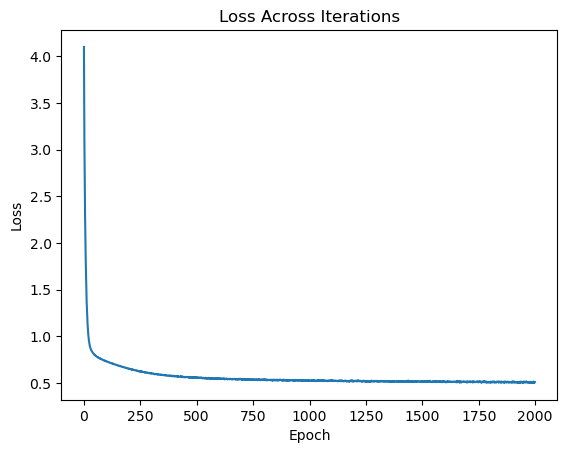

Weighted F1 Score: 0.6120


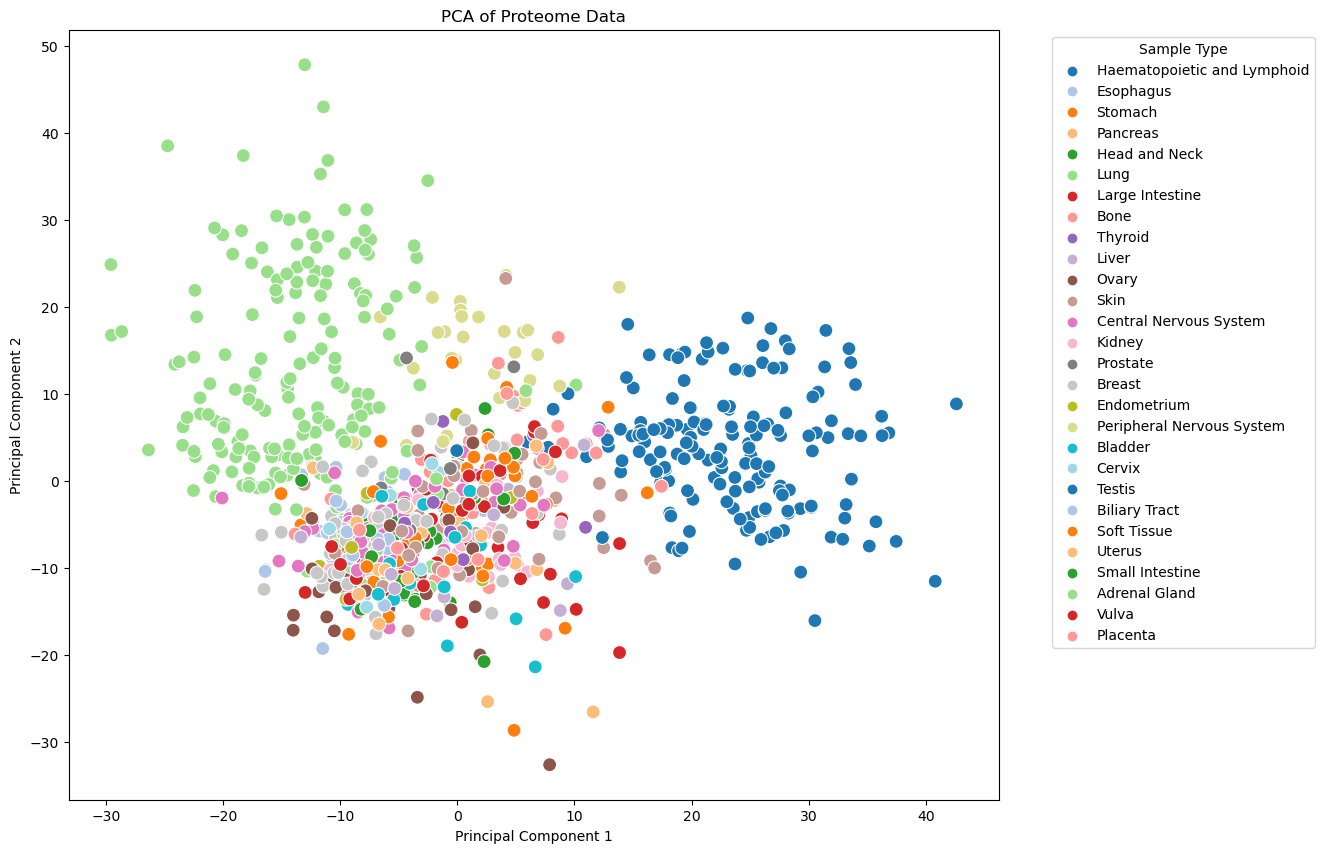

Top 10 feature names: Index(['BTK', 'MEF2B', 'FLI1', 'GSTM4', 'FYB1', 'RENBP', 'RUNX3', 'PLCB2',
       'RLBP1', 'GAB1'],
      dtype='object')


In [249]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess metadata
meta_data = pd.read_csv("./model_list_20230517.csv", sep=",")
meta_data = meta_data.set_index("model_id")
final_meta_data = meta_data.loc[new_protein_df.index]

# Encode tissue labels
label_encoder = LabelEncoder()
final_meta_data['tissue_encoded'] = label_encoder.fit_transform(final_meta_data['tissue'])

# Data Normalization
scaler = StandardScaler()
data = scaler.fit_transform(data_to_train)

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Define Encoder Model
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, latent_dim)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define Decoder Model
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define Classifier Model
class Classifier(nn.Module):
    def __init__(self, latent_dim, num_classes):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(latent_dim, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        return x

# Define Autoencoder Model
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, num_classes):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)
        self.classifier = Classifier(latent_dim, num_classes)

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        class_output = self.classifier(z)
        return x_recon, class_output

# Set Hyperparameters
input_dim = data.shape[1]
hidden_dim = 256
latent_dim = 128
num_classes = len(label_encoder.classes_)
num_epochs = 2000
batch_size = 32
learning_rate = 0.0001

# Prepare dataset and split into train and test sets
labels = final_meta_data['tissue_encoded'].values
dataset = CustomDataset(data, labels)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize Model, Losses, and Optimizer
model = Autoencoder(input_dim, hidden_dim, latent_dim, num_classes)
reconstruction_criterion = nn.MSELoss()
classification_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs, class_outputs = model(features)
        recon_loss = reconstruction_criterion(outputs, features)
        class_loss = classification_criterion(class_outputs, labels)
        loss = recon_loss + class_loss
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Plot the loss across iterations
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Across Iterations')
plt.show()

# Evaluation
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for features, labels in test_loader:
        _, class_outputs = model(features)
        preds = torch.argmax(class_outputs, dim=1)
        all_labels.extend(labels.numpy())
        all_preds.extend(preds.numpy())

# Calculate F1 Score
f1 = f1_score(all_labels, all_preds, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")

# Extract Latent Representations for the entire dataset
latent_representations = []

with torch.no_grad():
    for features, _ in DataLoader(dataset, batch_size=batch_size, shuffle=False):
        latent = model.encoder(features)
        latent_representations.append(latent.numpy())

latent_representations = np.concatenate(latent_representations, axis=0)

# Perform PCA on the latent representations
pca = PCA(n_components=2)
pca_result = pca.fit_transform(latent_representations)

# Convert PCA results to DataFrame
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Sample Type'] = np.array(final_meta_data["tissue"])

# Plot PCA results
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Sample Type', palette='tab20', s=100, legend='full')
plt.title('PCA of Proteome Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sample Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [250]:
# Extract the importance of each feature
encoder_weights = model.encoder.fc1.weight.data.cpu().numpy()
# Calculate the importance of each feature by summing the absolute values of weights across all neurons
feature_importances = np.abs(encoder_weights).sum(axis=0)

# Get the indices of the top features
top_feature_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
top_features = top_feature_indices[:10]  # Get the top 10 features

# Get the feature names corresponding to the top feature indices
feature_names = data_to_train.columns
top_feature_names = feature_names[top_features]

print("Top 10 feature names:", top_feature_names)


Autoencoder(
  (encoder): Encoder(
    (fc1): Linear(in_features=2328, out_features=256, bias=True)
    (fc2): Linear(in_features=256, out_features=128, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (decoder): Decoder(
    (fc1): Linear(in_features=128, out_features=256, bias=True)
    (fc2): Linear(in_features=256, out_features=2328, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (classifier): Classifier(
    (fc1): Linear(in_features=128, out_features=28, bias=True)
  )
)

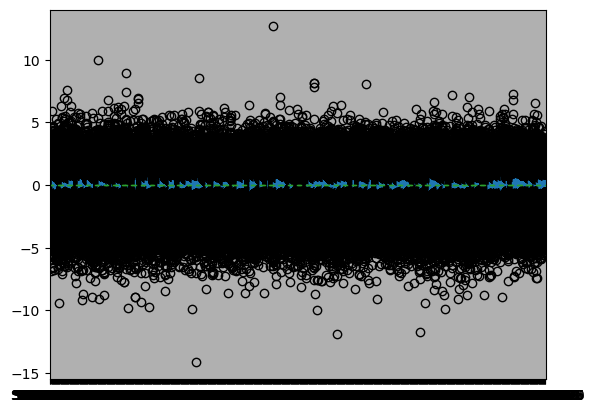

In [10]:
protein.boxplot(column = list(shared_col_name))  

plt.show()

<AxesSubplot:>

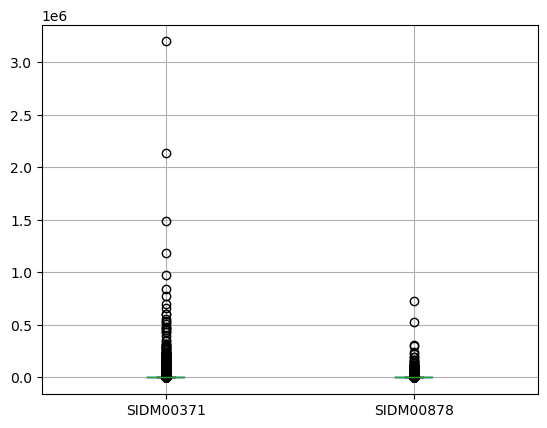

In [108]:
protein.boxplot(column = ["SIDM00887", "SIDM00700"])